<a href="https://colab.research.google.com/github/kay-kay-t/CodingDojo/blob/main/02_Linear_Regression_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
filename = '/content/drive/MyDrive/Boston_Housing_from_Sklearn.csv'

In [ ]:
# Load data 
housing = pd.read_csv(filename)
housing.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


1) Make a heatmap of the correlations.  Identify any features that have a correlation coefficient of 0.5 or greater with price.   We will limit our analysis to these three features.

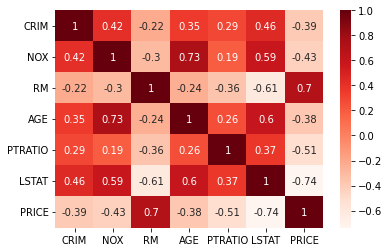

In [ ]:
corr = housing.corr()
sns.heatmap(corr, 
            cmap='Reds', 
            annot=True, 
            annot_kws={
                'fontsize':10
            });

plt.show()
#Based on heatmap below we will be working with RM, PTRATIO and LSTAT

In [ ]:
housing.corr() 

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
CRIM,1.000000,0.420972,-0.219247,0.352734,0.289946,0.455621,-0.388305
NOX,0.420972,1.000000,-0.302188,0.731470,0.188933,0.590879,-0.427321
RM,-0.219247,-0.302188,1.000000,-0.240265,-0.355501,-0.613808,0.695360
AGE,0.352734,0.731470,-0.240265,1.000000,0.261515,0.602339,-0.376955
PTRATIO,0.289946,0.188933,-0.355501,0.261515,1.000000,0.374044,-0.507787
LSTAT,0.455621,0.590879,-0.613808,0.602339,0.374044,1.000000,-0.737663
PRICE,-0.388305,-0.427321,0.695360,-0.376955,-0.507787,-0.737663,1.000000


2) Select columns for your feature matrix (X) and select PRICE for your target vector (y).

In [ ]:
y = housing['PRICE']
X = housing.loc[:, ['RM', 'PTRATIO', 'LSTAT']].values

In [ ]:
y.shape

(506,)

In [ ]:
X.shape

(506, 3)

3) Split your data into train and test groups. Please use random number 42 for consistency!

In [ ]:
# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

4) Instantiate your model and fit it on the training set.

In [ ]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

5) Evaluate your model performance using R^2 on the training set and on the test set.  Is there a difference between model performance on the training data vs the test data?

In [ ]:
train_score = reg_model.score(X_train, y_train)
print(train_score)

0.6877966145058925


In [ ]:
test_score = reg_model.score(X_test, y_test)
print(test_score)

0.6331590458194674


Per R^2 above, about 60% of the variation in 'Rings' can be explained by the features. Train and test scores are pretty close, so this model makes decent predictions on the test data.

6) Evaluate your model performance using RMSE on the training set and on the test set. This metric is useful because the units will be in the same units as your target vector. In this case 1,000 of dollars.  

In [ ]:
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, reg_model.predict(X_train))))

print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, reg_model.predict(X_test))))

Training RMSE: 5.261818774717492
Testing RMSE: 5.06841436710496


Tranning model is incorrect by 5.36 thouthand dollars. Testing model is incorrect by 5.06 thouthand dollars.